## EDA analyses for NY/Airbnb price analyses project

In [15]:
import wandb
import pandas as pd

###  Fetch artifact sample.csv in the initial version

In [ ]:
run = wandb.init(project="nyc_airbnb", group="eda") #save_code=True so the notebook is uploaded to W&B
local_path = wandb.use_artifact("sample.csv:v0").file()
df = pd.read_csv(local_path)

### Data analyses - pandas profiling and info() 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [22]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### Observations

In [5]:
# Two columns: last_review and reviews_per_month miss data. 
# Prices as well as longitude and latitude values have some extremes which will be taken out 
# Also the date will be converted from string to datetime format

### Data cleaning

In [4]:
# Drop price outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

# Drop locations outisde of NY
idx = df['longitude'].between(-74.25, -73.50) & df['latitude'].between(40.5, 41.2)
df = df[idx].copy()

# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

# Reset index to avoid creating df_index by pandas_profiling
df.reset_index(drop=True, inplace=True)

#### Chart: maximum values for minimum_nights 

<AxesSubplot:xlabel='last_review', ylabel='minimum_nights'>

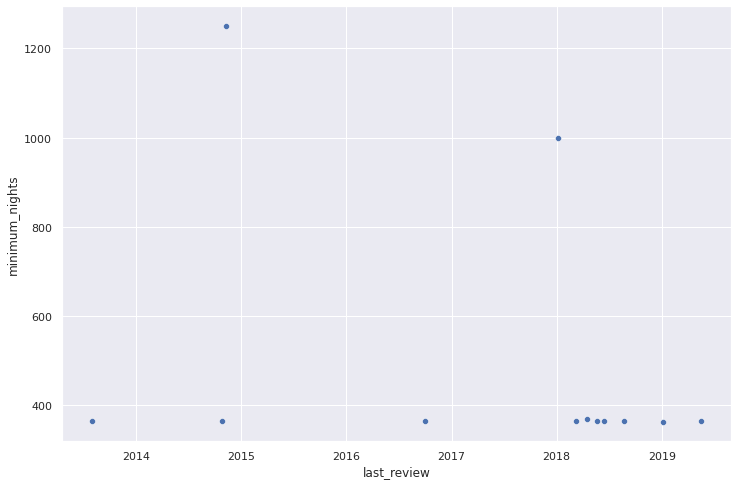

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
df2 = df[df['minimum_nights'] > 300]
sns.scatterplot(x=df2['last_review'], y=df2['minimum_nights'] )

In [6]:
# Drop entries where minimum_nights > 365

idx = df['minimum_nights'].between(0,365,inclusive='both')
df = df[idx].copy()

#### Chart: columns with missing values

<AxesSubplot:xlabel='last_review', ylabel='number_of_reviews'>

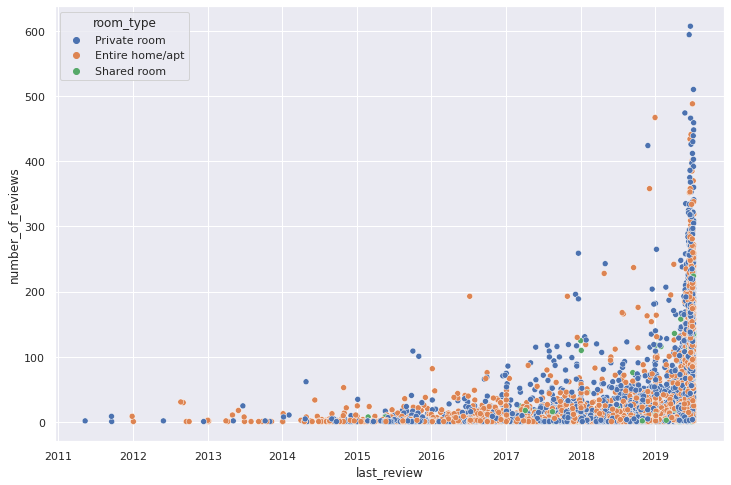

In [9]:
sns.scatterplot(x=df['last_review'], y=df['number_of_reviews'], hue=df['room_type'])

In [10]:
# Drop listings which have not got a reivew since 2013
# The data that we expect to receive will have almost no missing values 

idx = df['last_review'].gt(pd.Timestamp(2013, 1, 1, 12))
df = df[idx].copy()

#### Chart: price/minimum_nights, price/number_of_reviews, price/reviews_per_month with hue-'Room_type'

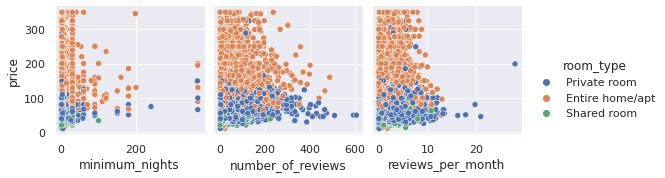

In [11]:
# This is only overview of price against some numerical values after we cleaned the data 

sns.pairplot(df, y_vars=['price'],x_vars=['minimum_nights', 'number_of_reviews', 'reviews_per_month'], hue="room_type")

In [12]:
# This line will finish the jupyter session so we can save it to wandb
run.finish()